In [1]:
import hmclab
import matplotlib.pyplot as plt
import numpy

In [2]:
prior_1 = hmclab.Distributions.Normal(
    means=[3, 3],
    covariance=[0.4,0.1],
)
prior_1_l = hmclab.Distributions.TransformToLogSpace(prior_1)


In [3]:
m1 = numpy.array([[100],[100]])
m2 = numpy.array([[101],[1001]])
m1t = prior_1_l.transform_forward(m1)

assert numpy.allclose(m1, prior_1_l.transform_backward(m1t))

m1t

array([[2.],
       [2.]])

In [4]:
prior_1_l.jacobian(m1) * prior_1_l.inverse_jacobian(m1t)

array([[1., 0.],
       [0., 1.]])

In [9]:
prior_1_l.gradient(m2)

array([[-1.07035923e-02],
       [ 1.88310320e-06]])

In [6]:
eta = 1e-1
prior_1_l.misfit(m2 * (1 + eta)) - prior_1_l.misfit(m2),(prior_1_l.gradient(m2).T @ m2) * eta

(0.09847397110233302, array([[-0.10791778]]))

In [7]:
sampler = hmclab.Samplers.RWMH()

sampler.sample(
    "bin_samples/tutorial_5.h5",
    prior_1_l,
    stepsize=1000,
    initial_model=m1,
    overwrite_existing_file=True,
    online_thinning=1,
    proposals=100000,
)


Tot. acc rate: 0.39. Progress: 100%|██████████| 100000/100000 [00:02<00:00, 39823.69it/s]


In [8]:
samples = sampler.load_results()

samples.shape

(3, 100000)

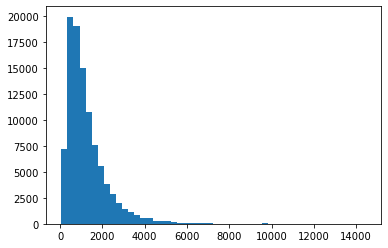

In [9]:
_ = plt.hist(samples[1,:], bins=50)

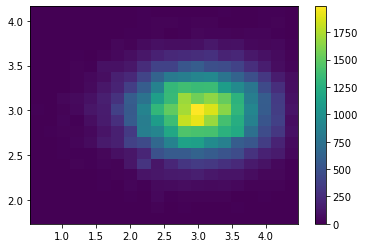

In [10]:
transform_samples = prior_1_l.transform_forward(samples[:-1,:])

_ = plt.hist2d(transform_samples[0,:], transform_samples[1,:],bins=20)
plt.colorbar()

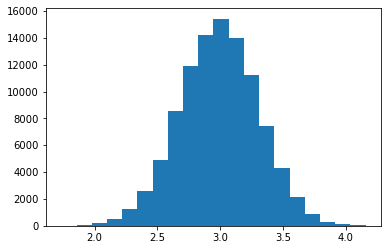

In [11]:
_ = plt.hist(transform_samples[1,:], bins=20)

In [91]:
prior_2_l.misfit(m1), prior_2_l.misfit(m1 * 1.1), prior_2_l.gradient(m1 * 1.1)

(20.878405262472093, 20.258305462762323, 114490.00000000004)